# Анализ данных по оценке аренды недвижимости г.Москвы ##

### 1.Прочтём наш DataSet

In [29]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('_data.csv')


### 2.Анализируем типы данных

In [30]:
df.describe()

,Unnamed: 0,ID объявления,"Высота потолков, м"
count,23368.000000,2.336800e+04,11206.00000
mean,11683.500000,2.676265e+08,2.98345
std,6745.904881,1.876862e+07,7.61472
min,0.000000,1.072986e+08,1.20000
25%,5841.750000,2.712663e+08,2.64000
50%,11683.500000,2.739030e+08,2.64000
75%,17525.250000,2.746872e+08,2.80000
max,23367.000000,2.750064e+08,320.00000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

### По колонке Dtype видим что данные  не в численном формате


### 3.Пронализируем структуру и подсчитаем объём , посмотрим часть в табличном виде 

In [32]:
df.head(5)


,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [33]:
df.tail(5)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525
23367,23367,274672243,"2, Оба варианта",Квартира,м. Говорово (10 мин пешком),"Москва, улица Богданова, 2к1, ш. Боровское (3 ...",90.0/48.2/15.5,"6/23, Панельный",NaN,"57000.0 руб./ За месяц, Залог - 60000 руб., Ко...",...,Во двор,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,NaN,Пасс (3),Да,https://www.cian.ru/rent/flat/274672243


## 4.Проанализируем название колонок на кирилические названия  >>

In [34]:
df.columns.tolist()

['Unnamed: 0',
 'ID  объявления',
 'Количество комнат',
 'Тип',
 'Метро',
 'Адрес',
 'Площадь, м2',
 'Дом',
 'Парковка',
 'Цена',
 'Телефоны',
 'Описание',
 'Ремонт',
 'Площадь комнат, м2',
 'Балкон',
 'Окна',
 'Санузел',
 'Можно с детьми/животными',
 'Дополнительно',
 'Название ЖК',
 'Серия дома',
 'Высота потолков, м',
 'Лифт',
 'Мусоропровод',
 'Ссылка на объявление']

## 5.Проанализируем индекс и название первой  колонки на идентичность >> 

## 6.Проанализируем нет ли других городов>>

Text(0.5, 1.0, 'Распределения квартир по городам')

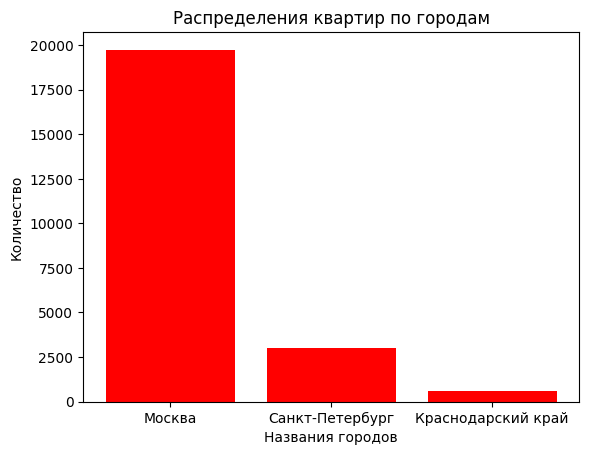

In [75]:
df['city'] = [row.split(',')[0] if isinstance(row, str) else row for row in df['Адрес']]
plt.bar(df['city'].value_counts().index, df['city'].value_counts(), color ='red')
plt.xlabel("Названия городов")
plt.ylabel("Количество");
plt.title("Распределения квартир по городам")

## 7.Проанализируем на недостаточность данных NaN

Text(0.5, 1.0, 'Количество отсутствующих данных')

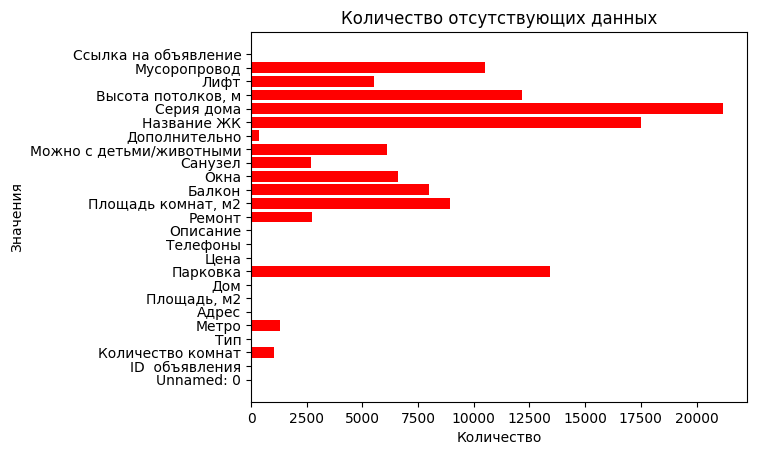

In [35]:

plt.barh(df.columns, df.isna().sum(), color ='red')
plt.xlabel("Количество")
plt.ylabel("Значения");
plt.title("Количество отсутствующих данных")



## На основании вышеперечисленного данных  и понимаем что данные нуждаются в рефактринге и очиске включающих в себя
###      Удаление дубликатов данных
###     Анализ и удаление колонок которые можно удалить
###     например маловажность данных, влияющих на цену аренды
###     Анализ и перевод в численный вид
###     Анализ и рефакторинг и разделение  данных исходя из текущих, для машинного анализа данных